In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from skimpy import skim
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('../data/processed/coches_caros_procc.csv')
df

,Brand_c,Price,Kilometers,Seats,Doors,Brand_Model_code,Car_Age,Country_c,Gearbox_c,Fuel_c,Seller_c,Type_c,Drivetrain_c,Upholstery_c,Color_c,Body_Type_c
0,22,69990.0,15.0,5.0,5.0,22.999,1,0,0,0,0,3,1,1,0,0
1,17,237500.0,5468.0,2.0,2.0,17.999,6,3,0,0,0,0,1,1,0,1
2,17,94890.0,156852.0,2.0,5.0,17.999,31,0,1,0,0,0,2,1,0,4
3,17,62000.0,30.0,5.0,5.0,17.131,1,1,1,0,0,0,0,0,2,1
4,17,74900.0,500.0,4.0,5.0,17.131,2,6,0,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,30,94990.0,11080.0,2.0,2.0,30.939,2,3,0,0,0,0,1,4,0,6
999,30,86990.0,33846.0,2.0,4.0,30.939,3,0,0,0,0,0,1,1,1,4
1000,30,65000.0,20064.0,2.0,3.0,30.425,10,0,0,0,1,0,1,5,3,4
1001,30,144900.0,3500.0,2.0,2.0,30.939,4,4,0,2,0,0,2,1,3,6


In [52]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1003   │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 16     │ │ float64     │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Brand_c            │   0 │     0 │    30.75 │   5.148 │     5 │    28 │     31 │     35 │      37 │   ▁▂▆█ │  │
│ │ Price              │   0 │     0 │   180300 │  248000 │ 60440 │ 78840 │ 116900 │ 210900 │ 4990000 │   █    │  │
│ │ Kilometers         │   0 │     0 │    28400 │   43950 │     0 │  1118 │  17000 │  43680 │ 1000000 │   █    │  │
│ │ Seats              │   0 │     0 │    4.103 │   1.543 │     2 │     2 │      4 │      5 │       8 │ ▆ ▅█ ▁ │  │
│ │ Doors              │   0 │     0 │    3.327 │    1.31 │     2 │     2 │      3 │      5 │       5 │ █ ▁ ▄▅ │  │
│ │ Brand_Model_code   │   0 │     0 │     31.2 │   5.013 │ 5.773 │ 28.59 │  31.68 │   35.4 │      38 │   ▁▂▇█ │  │
│ │ Car_Age            │   0 │     0 │    6.583 │   10.13 │     0 │     1 │      3 │      8 │      69 │   █▁   │  │
│ │ Country_c          │   0 │     0 │    1.645 │    2.03 │     0 │     0 │      1 │      3 │       7 │ █▁▂ ▁▁ │  │
│ │ Gearbox_c          │   0 │     0 │   0.1196 │  0.4066 │     0 │     0 │      0 │      0 │       2 │  █  ▁  │  │
│ │ Fuel_c             │   0 │     0 │   0.5414 │   1.208 │     0 │     0 │      0 │      0 │       9 │  █▁▁   │  │
│ │ Seller_c           │   0 │     0 │  0.02792 │  0.1648 │     0 │     0 │      0 │      0 │       1 │   █    │  │
│ │ Type_c             │   0 │     0 │   0.4207 │  0.9374 │     0 │     0 │      0 │      0 │       5 │   █▂   │  │
│ │ Drivetrain_c       │   0 │     0 │    1.278 │  0.4636 │     0 │     1 │      1 │      2 │       2 │    █ ▃ │  │
│ │ Upholstery_c       │   0 │     0 │    1.216 │  0.9676 │     0 │     1 │      1 │      1 │       5 │ ▁█▁ ▁  │  │
│ │ Color_c            │   0 │     0 │    2.056 │   2.674 │     0 │     0 │      1 │      3 │      13 │  █▁▂   │  │
│ │ Body_Type_c        │   0 │     0 │    2.704 │   2.371 │     0 │     0 │      4 │      4 │       8 │ █  ▇▂  │  │
│ └────────────────────┴─────┴───────┴──────────┴─────────┴───────┴───────┴────────┴────────┴─────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Definimos el X y el y , dividimos en train y test.

In [53]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [55]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (1003, 15)
Train features shape: (702, 15)
Train target shape: (702,)
Test features shape: (301, 15)
Test target shape: (301,)


In [57]:
# 1. Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 2. Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb.fit(X_train.values, y_train)
y_pred_gb = gb.predict(X_test)

# 3. Decision Tree
tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("COMPARACIÓN CON MODELOS DE ENSEMBLE:")
for name, pred in [('Random Forest', y_pred_rf), 
                   ('Gradient Boosting', y_pred_gb), 
                   ('Decision Tree', y_pred_tree)]:
    mse = metrics.mean_squared_error(y_test, pred)
    r2 = metrics.r2_score(y_test, pred)
    mae = metrics.mean_absolute_error(y_test, pred)
    
    print(f"{name:20} - MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
gb_mae = metrics.mean_absolute_error(y_test, y_pred_gb)
tree_mae = metrics.mean_absolute_error(y_test, y_pred_tree)

COMPARACIÓN CON MODELOS DE ENSEMBLE:
Random Forest        - MSE: 82428251837.6840, R²: 0.1095, MAE: 52276.4190
Gradient Boosting    - MSE: 84979821666.0275, R²: 0.0819, MAE: 51160.1443
Decision Tree        - MSE: 86727400433.7736, R²: 0.0631, MAE: 60718.7368


In [58]:
pickle.dump(rf, open("../models/coches_caros/Random_Forest_model.pkl", "wb"))
pickle.dump(gb, open("../models/coches_caros/Best_model.pkl", "wb"))
pickle.dump(tree, open("../models/coches_caros/Decision_Tree_model.pkl", "wb"))

In [ ]:
# Configuración mejorada
gb_better = GradientBoostingRegressor(
    n_estimators=300,           # ↑ Más árboles
    learning_rate=0.08,         # ↓ Tasa de aprendizaje más baja
    max_depth=6,                # ↑ Profundidad moderada
    min_samples_split=10,       # Evitar sobreajuste
    min_samples_leaf=5,         # Regularización
    subsample=0.8,              
    max_features='sqrt',        
    random_state=42,
    n_iter_no_change=10,
    validation_fraction=0.1 
)
gb_better.fit(X_train, y_train)
y_pred_gb = gb_better.predict(X_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', metrics.root_mean_squared_error(y_test, y_pred_gb))
print('R2:' , metrics.r2_score(y_test, y_pred_gb))

MAE: 56487.05624657855
MSE: 83049692131.1977
RMSE: 288183.43486605486
R2: 0.10278486699537637


In [27]:
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(10, 30),
    'min_samples_leaf': randint(4, 20),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

gb = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

print(f"\n🏆 MEJORES PARÁMETROS:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

    
best_model = random_search.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits

🏆 MEJORES PARÁMETROS:
  learning_rate: 0.037324266288405766
  max_depth: 7
  max_features: log2
  min_samples_leaf: 10
  min_samples_split: 12
  n_estimators: 112
  subsample: 0.724478254120072


In [28]:
bgrs_pred = best_model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, bgrs_pred))

MAE: 56282.99009410329


In [49]:
# Dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'verbose': -1,
    'random_state': 42
}
print("\n🚀 Probando LightGBM...")
# Entrenar
model_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=3000,
    callbacks=[lgb.early_stopping(200), lgb.log_evaluation(100)]
)


🚀 Probando LightGBM...
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 62941.1
[200]	valid_0's l1: 63350.5
[300]	valid_0's l1: 64040.4
Early stopping, best iteration is:
[136]	valid_0's l1: 61829.1


In [30]:
y_pred_lgb = model_lgb.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred_lgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb))
r2 = metrics.r2_score(y_test, y_pred_lgb)

print(f" RESULTADOS LightGBM:")
print(f"  MAE: €{mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")

lgb_mae = metrics.mean_absolute_error(y_test, y_pred_lgb)

 RESULTADOS LightGBM:
  MAE: €52,867
  RMSE: €287,885
  R²: 0.1046


In [37]:
pickle.dump(model_lgb, open("../models/coches_caros/LightGB_model.pkl", "wb"))

In [ ]:
# Convertir a formato DMatrix (óptimo para XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros optimizados
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}
print("🚀 Probando XGBoost...")
# Entrenar con early stopping
model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)

🚀 Probando XGBoost...
[0]	test-mae:108388.61768
[100]	test-mae:54095.92017
[200]	test-mae:53526.59981
[300]	test-mae:53128.00600
[400]	test-mae:53170.97805
[468]	test-mae:53390.00960


In [32]:
# Convertir a formato DMatrix el X_test tambien
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model_xgb.predict(dtest)

In [33]:
xgb_mae = metrics.mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2 = metrics.r2_score(y_test, y_pred_xgb)

print(f"EVALUACIÓN DE LAS METRICAS DE XGBoost:")
print(f"  MAE: €{xgb_mae:,.0f}")
print(f"  RMSE: €{rmse:,.0f}")
print(f"  R²: {r2:.4f}")



EVALUACIÓN DE LAS METRICAS DE XGBoost:
  MAE: €53,390
  RMSE: €290,455
  R²: 0.0886


In [38]:
pickle.dump(model_xgb, open("../models/coches_caros/XGBoost_model.pkl", "wb"))

In [28]:
results = pd.DataFrame({'y_test': y_test, 'pred_LGBM': y_pred_lgb, 'pred_xgb': y_pred_xgb})
results.head(10)

,y_test,pred_LGBM,pred_xgb
626,290000.0,151888.100751,125935.617188
629,339995.0,232795.305515,263904.937500
847,299659.0,246592.432469,268498.375000
514,110000.0,131207.188921,106971.140625
365,74900.0,98922.048828,67348.226562
903,134990.0,191067.731460,200337.046875
655,395000.0,415247.409451,410565.812500
528,74900.0,66571.793972,71059.375000
321,75999.0,131236.710644,120239.632812
70,153021.0,213785.023418,170445.656250


## Modelo NO Supervisado

In [39]:
# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering para crear segmentos
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['segmento_mercado'] = kmeans.fit_predict(X_scaled)

# PCA para reducir ruido
pca = PCA(n_components=0.9)
pca_features = pca.fit_transform(X_scaled)

# Crear nuevo DataFrame con todo
X_enhanced = pd.DataFrame(X_scaled, columns=X.columns)
for i in range(pca.n_components_):
    X_enhanced[f'pca_{i}'] = pca_features[:, i]

X_enhanced['segmento'] = df['segmento_mercado']
X_enhanced['dist_centroide'] = kmeans.transform(X_scaled).min(axis=1)

# Calcular distancia a cada centroide
distances = kmeans.transform(X_scaled)
for i in range(kmeans.n_clusters):
    X_enhanced[f'dist_centroide_{i}'] = distances[:, i]

# Modelo supervisado final
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Parámetros de XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 1.0,
    'random_state': 42,
    'n_jobs': -1
}

model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=3000,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=200,
    verbose_eval=100
)

[0]	train-mae:106344.99478	test-mae:113253.16597
[100]	train-mae:26589.33288	test-mae:60146.61000
[200]	train-mae:19883.53628	test-mae:62829.18258
[274]	train-mae:15893.02878	test-mae:63515.98861


In [40]:
# Evaluación
y_pred = model_xgb.predict(dtest)
no_superv_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Resultados del modelo híbrido:")
print(f"R²: {metrics.r2_score(y_test, y_pred):.4f}")
print(f"Error medio absoluto: ${no_superv_mae:,.2f}")

Resultados del modelo híbrido:
R²: 0.0703
Error medio absoluto: $63,515.99


In [48]:
precio_min = df['Price'].min()
precio_max = df['Price'].max()
precio_promedio_estimado = np.mean([precio_min, precio_max])

# Calcular error relativo
error_relativo_porcentaje = (gb_mae / precio_promedio_estimado) * 100

print(f"ANÁLISIS CON RANGO €{precio_min} - {precio_max}")
print("="*60)
print(f"• Rango de precios: €{precio_min:,} - €{precio_max:,}")
print(f"• Precio promedio estimado: €{precio_promedio_estimado:,.0f}")
print(f"• Error absoluto (MAE): €{gb_mae:,}")
print(f"• Error relativo: {error_relativo_porcentaje:.1f}% del precio promedio")

ANÁLISIS CON RANGO €60440.0 - 4990000.0
• Rango de precios: €60,440.0 - €4,990,000.0
• Precio promedio estimado: €2,525,220
• Error absoluto (MAE): €51,160.14427510241
• Error relativo: 2.0% del precio promedio


In [41]:
dict_maes = {
    'Random Forest': rf_mae,
    'Decision Tree': tree_mae,
    'Gradient Boosting': gb_mae,
    'LightGBM': lgb_mae,
    'XGBoost': xgb_mae,
    'No Supervisado': no_superv_mae
}

modelos = list(dict_maes.keys())
mae_valores = list(dict_maes.values())

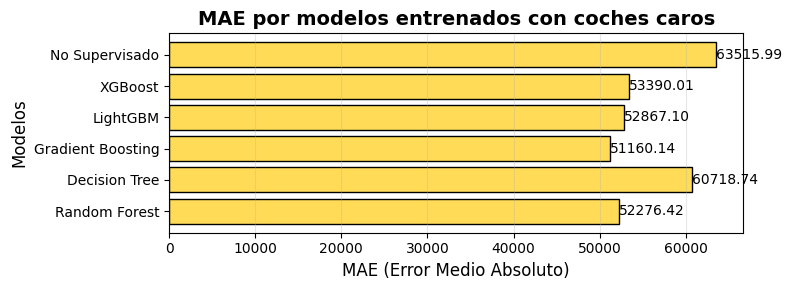

In [42]:
plt.figure(figsize=(8, 3))
bars = plt.barh(modelos, mae_valores, color='#FFDB58', edgecolor='black')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}', ha='left', va='center', fontsize=10)

plt.title('MAE por modelos entrenados con coches caros', fontsize=14, fontweight='bold')
plt.xlabel('MAE (Error Medio Absoluto)', fontsize=12)
plt.ylabel('Modelos', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()